In [1]:
import requests
from bs4 import BeautifulSoup
import csv

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

try:
    response = requests.get(url)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"Error fetching {url}: {e}")
    exit()

soup = BeautifulSoup(response.text, 'html.parser')

data = []

# Find the specific table we want (the first one in this case)
table = soup.find('table', {'class': 'wikitable'})

if table:
    headers = [header.text.strip() for header in table.find_all('th')]
    if headers:
        data.append(headers)

    for row in table.find_all('tr'):
        cols = [col.text.strip() for col in row.find_all('td')]
        if cols:
            data.append(cols)
else:
    print("No table found on the page.")

if not data:
    print("No data found on the page.")
    exit()

csv_filename = 'scraped_data.csv'
try:
    with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerows(data)
    print(f'Data has been saved to {csv_filename}')
except IOError as e:
    print(f"Error writing to {csv_filename}: {e}")

Data has been saved to scraped_data.csv


  Unnamed: 0       Location     Population   % ofworld  \
0          –          World  8,118,144,000        100%   
1   1/2  [b]          China  1,409,670,000       17.4%   
2      India  1,404,910,000          17.3%  1 Jul 2024   
3          3  United States    335,893,238        4.1%   
4          4      Indonesia    281,603,800        3.5%   

                     Date Source (official or fromthe United Nations)  \
0             13 Jul 2024                            UN projection[3]   
1             31 Dec 2023                        Official estimate[5]   
2  Official projection[6]                                         [d]   
3              1 Jan 2024                        Official estimate[7]   
4              1 Jul 2024               National annual projection[8]   

  Unnamed: 6  
0        NaN  
1        [c]  
2        NaN  
3        [e]  
4        NaN  
        Location  Population % ofworld         Date  \
0          World  8118144000      100%  13 Jul 2024   
1          C

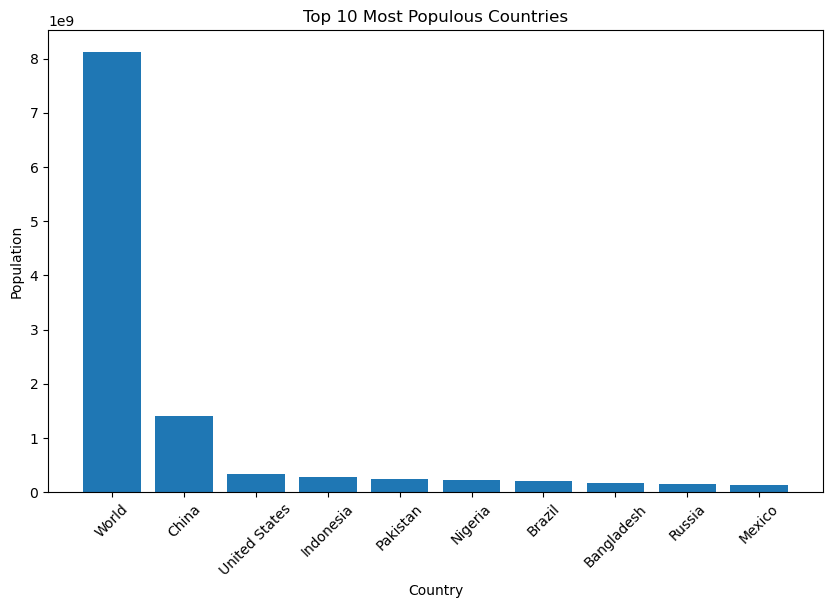